In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import  XGBRegressor
from sklearn.model_selection import GridSearchCV



## **Predicting weather conditions **

In [4]:
df = pd.read_csv('temps.csv')
print(df.shape)
print(df.columns)


(348, 12)
Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')


**Feature types:**

**Categorical features:** week

**Numeric features:** year, month, day, temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend

In [7]:
df.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,NaN,2022,1,Fri,45,45,45.6,45,43,50,44,29
1,NaN,2022,2,Sat,44,45,45.7,44,41,50,44,61
2,NaN,2022,3,Sun,45,44,45.8,41,43,46,47,56
3,NaN,2022,4,Mon,44,41,45.9,40,44,48,46,53
4,NaN,2022,5,Tues,41,40,46.0,44,46,46,46,41
5,NaN,2022,6,Wed,40,44,46.1,51,43,49,48,40
6,NaN,2022,7,Thurs,44,51,46.2,45,45,49,46,38
7,NaN,2022,8,Fri,51,45,46.3,48,43,47,46,34
8,NaN,2022,9,Sat,45,48,46.4,50,46,50,45,47
9,NaN,2022,10,Sun,48,50,46.5,52,45,48,48,49


In [9]:
df.info()
#no null values found in our dataset, and one categorical feature is observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            0 non-null      float64
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 32.8+ KB


In [11]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,0.0,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,NaN,2022.0,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,NaN,0.0,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,NaN,2022.0,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,NaN,2022.0,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,NaN,2022.0,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,NaN,2022.0,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,NaN,2022.0,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [13]:
#create a new copy of df for temporary work around
df_new = df.copy()

#drop year as it is same value for entire column
df_new.drop(['year'],axis=1,inplace=True)

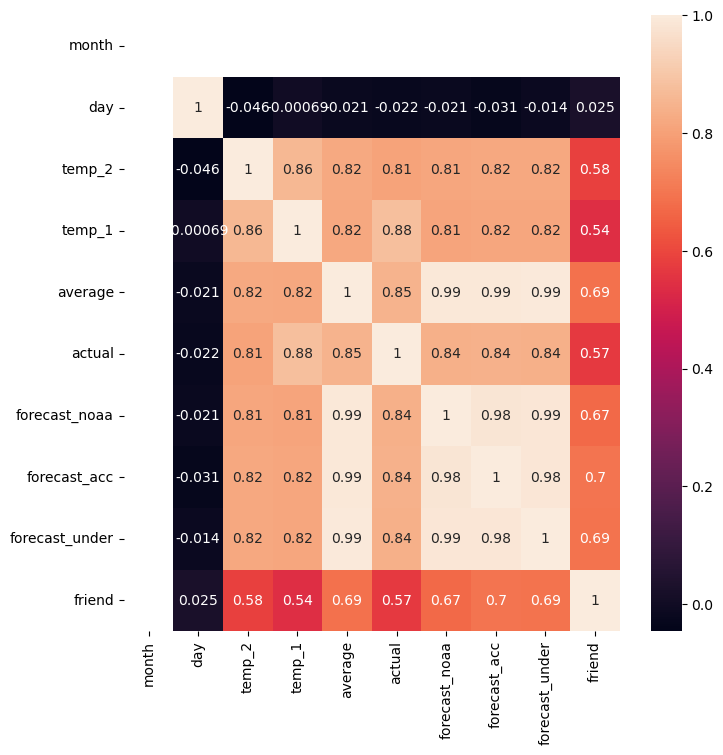

In [15]:
# Correlation map (excluding non-numeric columns)
plt.figure(figsize=(8,8))
numeric_df = df_new.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


From heatmap we could see month and day column has least correlations, all other features has impact on weather

**Let's visualize correlation between label and each feature**

Text(0, 0.5, 'actual')

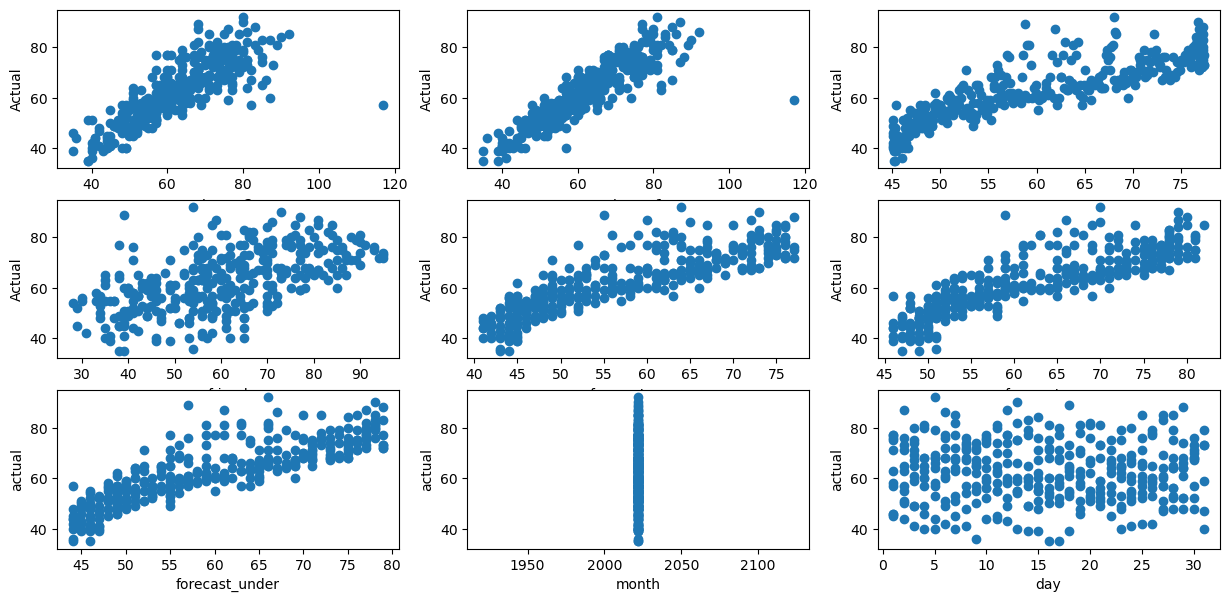

In [19]:
fig,ax = plt.subplots(3,3, figsize=(15,7))
plt.subplot(3,3,1)
plt.scatter('temp_2','actual',data=df)
plt.xlabel('temp_2')
plt.ylabel('Actual')

plt.subplot(3,3,2)
plt.scatter('temp_1','actual',data=df)
plt.xlabel('temp_1')
plt.ylabel('Actual')

plt.subplot(3,3,3)
plt.scatter('average','actual',data=df)
plt.xlabel('average')
plt.ylabel('Actual')

plt.subplot(3,3,4)
plt.scatter('friend','actual',data=df)
plt.xlabel('friend')
plt.ylabel('Actual')

plt.subplot(3,3,5)
plt.scatter('forecast_noaa','actual',data=df)
plt.xlabel('forecast_noaa')
plt.ylabel('Actual')

plt.subplot(3,3,6)
plt.scatter('forecast_acc','actual',data=df)
plt.xlabel('forecast_acc')
plt.ylabel('Actual')


plt.subplot(3,3,7)
plt.scatter('forecast_under','actual',data=df)
plt.xlabel('forecast_under')
plt.ylabel('actual')

plt.subplot(3,3,8)
plt.scatter('month','actual',data=df)
plt.xlabel('month')
plt.ylabel('actual')

plt.subplot(3,3,9)
plt.scatter('day','actual',data=df)
plt.xlabel('day')
plt.ylabel('actual')


From above plots we can see that except day and month there is a linear relationship between feature and label.

Drop day, year and week columns as they are not usefull for predictions

In [22]:
df.drop(['day','year','week'],axis=1,inplace=True)

Create dummies for months as it is nominal in nature

In [24]:
month_dum = pd.get_dummies(df['month'],drop_first=True)
df= pd.concat([df,month_dum],axis=1)
df.drop(['month'],axis=1,inplace=True)


In [25]:
print(df.shape)
df.head()


(348, 8)


,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


In [29]:
#separate features and label

y = df['actual']
df.drop(['actual'],inplace=True,axis=1)

In [32]:
#features
X=df


In [34]:
#split for train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(278, 7)
(70, 7)


**Creating model**

**Fitting and predicting using KNN regressor**

In [38]:
knn =KNeighborsRegressor(n_neighbors=3)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
pred_knn = knn.predict(X_test)
pred_knn

array([64.33333333, 63.        , 51.66666667, 65.66666667, 67.66666667,
       73.        , 84.        , 76.66666667, 64.        , 74.33333333,
       65.33333333, 69.        , 42.        , 65.33333333, 71.        ,
       53.33333333, 64.66666667, 57.        , 56.33333333, 78.        ,
       60.33333333, 51.66666667, 68.        , 60.66666667, 57.66666667,
       53.        , 74.        , 48.        , 65.33333333, 78.66666667,
       62.        , 62.        , 50.33333333, 75.66666667, 76.33333333,
       58.        , 53.66666667, 51.33333333, 70.        , 43.33333333,
       66.66666667, 60.33333333, 74.        , 40.66666667, 60.        ,
       71.        , 55.66666667, 80.33333333, 54.66666667, 40.66666667,
       47.33333333, 40.66666667, 66.33333333, 66.33333333, 72.66666667,
       59.66666667, 55.33333333, 69.33333333, 53.33333333, 61.66666667,
       66.33333333, 50.        , 57.66666667, 72.        , 65.        ,
       58.66666667, 77.        , 71.        , 75.66666667, 43.  

In [42]:
print('Explained variance for knn is:', metrics.explained_variance_score(pred_knn,y_test))
print('\n RMSE for knn is:',np.sqrt(metrics.mean_squared_error(pred_knn,y_test)))

Explained variance for knn is: 0.7396478780882313

 RMSE for knn is: 5.505264435786578


**Predictions using linear regression**

In [45]:
lin = LinearRegression()
lin.fit(X_train,y_train)


LinearRegression()

In [47]:
print(lin.coef_)
print(lin.intercept_)

[ 0.06238599  0.46452531  0.88500967 -0.05864304  0.04125336 -0.40150848
 -0.01332689]
1.9605400424881267


In [49]:
pred_lin = lin.predict(X_test)
pred_lin

array([67.52430047, 61.69759404, 49.0669587 , 61.58220456, 68.72579878,
       70.42992137, 79.42618361, 81.67874568, 59.14176841, 76.67399493,
       59.57104433, 78.13423223, 42.73046658, 64.12273396, 70.4114456 ,
       54.41233489, 60.97648361, 56.03278919, 54.91843548, 78.69442511,
       65.67073266, 54.8337018 , 65.40774733, 61.38302827, 57.10060121,
       51.69032868, 65.72768788, 48.75008194, 63.72979593, 76.31217778,
       68.06270966, 63.61750442, 52.97697667, 80.3403236 , 75.28744373,
       56.0528417 , 54.45899792, 49.50389268, 71.67690745, 46.16402247,
       65.94326179, 54.86688436, 72.07903736, 45.38831982, 60.44886281,
       70.67916955, 54.64293466, 79.50992436, 55.27856525, 45.14394286,
       48.9282574 , 44.59715684, 64.46087129, 67.00624949, 75.76239632,
       60.51883266, 55.65676415, 61.44696668, 52.46229206, 59.68124923,
       68.3491847 , 50.39610781, 57.45104183, 69.61241875, 58.8530079 ,
       58.03715341, 75.33176683, 71.88469627, 75.29882455, 45.40

In [51]:
print('Explained variance for linear regression is:', metrics.explained_variance_score(pred_lin,y_test))
print('\n RMSE for linear regression is:',np.sqrt(metrics.mean_squared_error(pred_lin,y_test)))

Explained variance for linear regression is: 0.7978187189698134

 RMSE for linear regression is: 4.730203081937616


**Using XGboost regressor to predict**

In [54]:
xg  =XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
pred_xg = xg.predict(X_test)
pred_xg

array([71.72175 , 62.196964, 51.416676, 62.919247, 64.10202 , 71.2197  ,
       80.2156  , 75.35388 , 66.987495, 74.632835, 66.12735 , 70.70295 ,
       41.957314, 62.62481 , 73.55029 , 57.04041 , 61.462822, 58.78055 ,
       55.91108 , 73.97698 , 63.951862, 53.95068 , 67.88935 , 58.43929 ,
       59.01012 , 53.75445 , 66.22699 , 45.611183, 60.46624 , 81.76607 ,
       73.00345 , 63.004925, 55.15221 , 84.0688  , 75.86737 , 60.699192,
       52.373974, 51.378788, 66.651115, 40.768253, 64.703125, 58.84663 ,
       80.06707 , 40.368156, 62.256454, 77.93893 , 53.276623, 86.053375,
       53.591473, 43.469955, 47.981483, 41.6484  , 63.869267, 64.92494 ,
       75.95369 , 60.026592, 54.506226, 58.5531  , 57.188564, 59.09496 ,
       65.00593 , 51.72081 , 67.27435 , 68.711754, 66.470535, 59.778347,
       71.87712 , 67.670166, 77.46966 , 42.581226], dtype=float32)

In [58]:
print('Explained variance for XGVoost Regressor is:', metrics.explained_variance_score(pred_xg,y_test))
print('\n RMSE for XGBoost Regressor is:',np.sqrt(metrics.mean_squared_error(pred_xg,y_test)))

Explained variance for XGVoost Regressor is: 0.7091182169419137

 RMSE for XGBoost Regressor is: 5.898033623995469


**Fitting and predicting using Random Forest model**

In [61]:
rf = RandomForestRegressor(random_state=5, n_estimators=20)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=5)

In [63]:
pred_rf = rf.predict(X_test)
pred_rf

array([67.6 , 63.65, 49.55, 64.  , 68.15, 74.  , 80.35, 74.25, 63.1 ,
       75.95, 64.95, 74.05, 37.9 , 61.9 , 70.4 , 56.95, 61.45, 57.05,
       56.8 , 75.55, 61.5 , 53.65, 67.05, 60.7 , 59.85, 53.2 , 64.8 ,
       45.5 , 62.9 , 79.6 , 72.7 , 63.95, 53.95, 84.8 , 75.7 , 60.65,
       53.55, 52.  , 68.45, 43.35, 72.65, 57.9 , 78.1 , 42.4 , 62.45,
       77.85, 53.5 , 81.35, 53.35, 41.8 , 47.3 , 41.5 , 65.9 , 66.65,
       74.35, 62.15, 54.65, 59.65, 54.  , 60.35, 67.35, 49.95, 59.6 ,
       70.05, 63.05, 60.  , 76.1 , 69.2 , 76.4 , 41.75])

In [65]:
print('Explained variance for Random forest is:', metrics.explained_variance_score(pred_rf,y_test))
print('\n RMSE for Random forest is:',np.sqrt(metrics.mean_squared_error(pred_rf,y_test)))

Explained variance for Random forest is: 0.8174758724278846

 RMSE for Random forest is: 4.737709663660581


**Conclusion: Random Forest worked better than xgboost, linear regression and KNN regressor**

**Result: Model : Random forest**

**RMSE : 4.8**

**Explained variance: 0.812**